In [2]:
# ALL imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
#### CS 280 Final Project - FA23
---

# How Happy Are We?

### By: Mo Asad, Nathaniel Gordon, Brendan Hasara


---

## 1. Introduction

For this project, our group explored data that identified key metrics in gauging the happiness of the global population from the years 2005-2016.

When looking at this dataset, we came to an overarching question: How do the variations in socioeconomic status influence the perception of trust and happiness throughout different countries?

To answer this, we needed to ask a few deeper questions to paint a more in-depth understanding of the overarching question at hand.



1. Does the average GDP per capita have a direct relationship with the perceived happiness (life ladder) of that country's population?
2. Is there an overall significant cause/effect relationship between social support and generosity?
3. Does freedom to make life choices influence the confidence placed in each country's national government?
4. Is there a need for a higher GDP per capita in order to expect a higher health life expectancy at birth?
5. On a global scale, are people more happy or sad over the years?

---

## 2. Data

A direct link to the data can be found at the following website.
 * https://data.world/laurel/world-happiness-report-data/workspace/file?filename=online-data-chapter-2-whr-2017.xlsx

**This World Happiness Report was collected via surveys conducted by countries throughout the world from the years of 2005 to 2016. The report measured countries on a point system for various qualities of life including life ladder, social support, trustworthiness of others, life expectancy, perceptions of corruptions, etc.**

In [4]:
#importing the data from github
world = pd.read_csv("https://raw.githubusercontent.com/GoodGuyMomo/CS-280-Final-Project/main/happy_data.csv")
world


,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Zimbabwe,Zimbabwe,2012,4.955101,7.407775,0.896476,45.319149,0.469531,-0.059864,0.858691,...,NaN,NaN,0.487203,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1416,Zimbabwe,Zimbabwe,2013,4.690188,7.429061,0.799274,47.000294,0.575884,-0.062995,0.830937,...,NaN,NaN,0.555439,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1417,Zimbabwe,Zimbabwe,2014,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,...,NaN,NaN,0.601080,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1418,Zimbabwe,Zimbabwe,2015,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,...,NaN,NaN,0.655137,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942


In [6]:
#Rename the columns and clear out unnecessary columns
columns_to_remove = ['WP5 Country',
                     'GINI index (World Bank estimate)',
                     'GINI index (World Bank estimate), average 2000-13',
                     'gini of household income reported in Gallup, by wp5-year',
                     'Most people can be trusted, WVS round 1981-1984',
                     'Most people can be trusted, WVS round 1989-1993',
                     'Most people can be trusted, WVS round 1994-1998',
                     'Most people can be trusted, WVS round 1999-2004',
                     'Most people can be trusted, WVS round 2005-2009',
                     'Most people can be trusted, WVS round 2010-2014']

# Remove multiple columns from the DataFrame
new_world = world.drop(columns=columns_to_remove)

#Rename some columns for clarity
new_world.rename(columns={'Log GDP per capita': 'GDP per capita',
                         'Most people can be trusted, Gallup': 'Trustworthiness of others'}, inplace = True)
new_world

,country,year,Life Ladder,GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Trustworthiness of others
0,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,0.517637,0.258195,0.612072,-1.962724,-1.665877,1.774662,0.476600,NaN
1,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,0.583926,0.237092,0.611545,-2.082451,-1.647945,1.722688,0.391362,0.286315
2,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,0.618265,0.275324,0.299357,-2.015700,-1.630097,1.878622,0.394803,0.275833
3,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,0.611387,0.267175,0.307386,-1.943686,-1.620443,1.785360,0.465942,NaN
4,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,0.710385,0.267919,0.435440,-1.855898,-1.435541,1.798283,0.475367,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Zimbabwe,2012,4.955101,7.407775,0.896476,45.319149,0.469531,-0.059864,0.858691,0.669279,0.177311,0.407084,-1.117682,-1.477044,1.853195,0.373997,NaN
1416,Zimbabwe,2013,4.690188,7.429061,0.799274,47.000294,0.575884,-0.062995,0.830937,0.711885,0.182288,0.527755,-1.031373,-1.471021,1.964805,0.418918,NaN
1417,Zimbabwe,2014,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,0.725214,0.239111,0.566209,-0.962947,-1.468772,2.079248,0.496899,NaN
1418,Zimbabwe,2015,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,0.715079,0.178861,0.590012,NaN,NaN,2.198865,0.593776,NaN


### 2.1 Summary of Variables within the World Happiness Table

The "new_world" table has 17 columns/variables and 1420 rows. The original dataset had 27 columns, but we decided to remove certain columns either because they were redundant or irrelavent to the the purpose of this study. We will now explain each variable, giving their units, indicating their types, and providing some descriptive statistics if necessary.

**There are 2 categorical variables**
        
* **country** – Country name
    * Number of missing values: 0
    * Contains 164 distinct values:
        *   Afghanistan, Albania, Algeria, Angola, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahrain

* **year** – Year
    * Number of missing values: 0
    * Contains 12 distinct values:
        *   2005-2016
        
**There are 15 numerical variables**

* **Life ladder** – score that represents one's own position in life with 10 being the best and 1 being the worst
    * Number of missing values: 0
    * max value: 8.018934
    * min value: 2.687553
    * average value: 5.428571

* **GDP per capita** – GDP per capita in purchasing power parity at constant 2011 int. dollar prices
    * Number of missing values: 35
    * max value: 11.815410
    * min value: 6.354652
    * average value: 9.203860
    
* **Social support** – national average of a binary response (between 0 and 1) for having support on others for when times are tough
    * Number of missing values: 12
    * max value: 0.987343
    * min value: 0.290184
    * average value: 0.811142

* **Healthy life expectancy at birth** – The time series of healthy life expectancy at birth
    * Number of missing values: 9
    * max value: 76.408699
    * min value: 36.167667
    * average value: 61.965278

* **Freedom to make life choices** – National avg responses to “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?" (Binary; yes or no; 0-1)
    * Number of missing values: 34
    * max value: 0.983803
    * min value: 0.257534
    * average value: 0.723822

* **Generosity** – National avg responses to “Have you donated money to a charity in the past month?” on GDP per capita (yes or no)

    * Number of missing values: 92
    * max value: 0.542249
    * min value: -0.324367
    * average value: 0.000201
    
* **Perceptions of corruption** – Avg response to “Is corruption widespread throughout the government, businesses, etc.” (yes or no)
    * Number of missing values: 84
    * max value: 0.983276
    * min value: 0.035198
    * average value: 0.755678
    
* **Positive affect** – The average of three positive affect measures in GWP: happiness, laugh and enjoyment in the Gallup World Poll (yes or no)
    * Number of missing values: 17
    * max value: 0.943621
    * min value: 0.362498
    * average value: 0.709873
    
* **Negative affect** – average of three negative affect measures in GWP: worry, sadness, and anger (yes or no)
    * Number of missing values: 11
    * max value: 0.704590
    * min value: 0.083426
    * average value: 0.260295
    
* **Confidence in national government** – yes or no response to the question "Do you have confidence in your national government?"
    * Number of missing values: 195
    * max value: 0.979501
    * min value: 0.068769
    * average value: 0.464820    

* **Democratic quality** – 0-1 rating based on six dimensions: Voice and Accountability, Political Stability and Absence of Violence, Government Effectiveness, Regulatory Quality, Rule of Law, Control of Corruption.
    * Number of missing values: 292
    * max value: 1.538103
    * min value: -2.310710
    * average value: -0.143355
    
* **Delivery Quality** – similar to Democratic quality, based on the six dimensions previously mentioned on a 0-1 scale
    * Number of missing values: 291
    * max value: 2.200550
    * min value: -2.167530
    * average value: -0.002564   

* **Standard deviation of ladder by country-year** – standard deviation of life ladder per country and year
    * Number of missing values: 0
    * max value: 3.527820
    * min value: 0.863034
    * average value: 1.983658  

* **Standard deviation/mean of ladder by country-year** – standard deviation and mean of life ladder per country and year
    * Number of missing values: 0
    * max value: 1.022769
    * min value: 0.133908
    * average value: 0.383186  

* **Trustworthiness of others** – Avg response to “Generally speaking, would you say that most people can be trusted or that you have to be careful..."
    * Number of missing values: 1240
    * max value: 0.640332
    * min value: 0.066618
    * average value: 0.226295  

### 2.2 Code used to Summarize Variables

In this section we include the code used to describe the variables in the previous section.

In [30]:
#Descriptive stats for all columns in the dataframe
new_world.describe()

,year,Life Ladder,GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Trustworthiness of others
count,1420.000000,1420.000000,1385.000000,1408.000000,1411.000000,1386.000000,1328.000000,1336.000000,1403.000000,1409.000000,1225.000000,1128.000000,1129.000000,1420.000000,1420.000000,180.000000
mean,2011.303521,5.428571,9.203860,0.811142,61.965278,0.723822,0.000201,0.755678,0.709873,0.260295,0.464820,-0.143355,-0.002564,1.983658,0.383186,0.226295
std,3.149570,1.121719,1.183485,0.119286,8.198405,0.146490,0.159385,0.186446,0.107631,0.082701,0.178399,0.865859,0.961750,0.366721,0.114287,0.119079
min,2005.000000,2.687553,6.354652,0.290184,36.167667,0.257534,-0.324367,0.035198,0.362498,0.083426,0.068769,-2.310710,-2.167530,0.863034,0.133908,0.066618
25%,2009.000000,4.600384,8.306463,0.750623,57.029228,0.629931,-0.110767,0.698339,0.622200,0.202129,0.328487,-0.800332,-0.705457,1.732018,0.309646,0.139773
50%,2011.000000,5.317440,9.378672,0.833718,63.782501,0.739609,-0.017912,0.810556,0.717980,0.249856,0.453570,-0.252632,-0.227479,1.948063,0.367580,0.198450
75%,2014.000000,6.269866,10.159828,0.904155,67.936405,0.838298,0.092981,0.882902,0.802945,0.307471,0.592506,0.649054,0.671737,2.191734,0.445621,0.281627
max,2016.000000,8.018934,11.815410,0.987343,76.408699,0.983803,0.542249,0.983276,0.943621,0.704590,0.979501,1.538103,2.200550,3.527820,1.022769,0.640332


This code is to count the number of *missing* values for each variable/column in the dataframe.

In [11]:
#To count the number of missing values for each variable/column
nan_counts = new_world.isna().sum()
print(nan_counts)

country                                                 0
year                                                    0
Life Ladder                                             0
GDP per capita                                         35
Social support                                         12
Healthy life expectancy at birth                        9
Freedom to make life choices                           34
Generosity                                             92
Perceptions of corruption                              84
Positive affect                                        17
Negative affect                                        11
Confidence in national government                     195
Democratic Quality                                    292
Delivery Quality                                      291
Standard deviation of ladder by country-year            0
Standard deviation/Mean of ladder by country-year       0
Trustworthiness of others                            1240
dtype: int64


This code is to count the number of *unique* values for each variable/column in the dataframe.

In [12]:
# Count unique values for each column
unique_counts = new_world.nunique()
print(unique_counts)

country                                               164
year                                                   12
Life Ladder                                          1420
GDP per capita                                       1385
Social support                                       1408
Healthy life expectancy at birth                     1366
Freedom to make life choices                         1386
Generosity                                           1328
Perceptions of corruption                            1336
Positive affect                                      1403
Negative affect                                      1409
Confidence in national government                    1225
Democratic Quality                                   1128
Delivery Quality                                     1129
Standard deviation of ladder by country-year         1420
Standard deviation/Mean of ladder by country-year    1419
Trustworthiness of others                             180
dtype: int64


---

## Playground

**Visualization 1**

In [34]:
#Is there a need for a higher GDP per capita in order to expect a higher health life expectancy at birth? 2008 - 2016
#GDP per capita
gdp_per_capita_countries = new_world.groupby("country")[["GDP per capita"]].mean().rename(columns={"GDP per capita": "Mean Log GDP per capita 2008-2016"}).reset_index()
gdp_per_capita_countries

,country,Mean Log GDP per capita 2008-2016
0,Afghanistan,7.447978
1,Albania,9.172559
2,Algeria,9.498361
3,Angola,8.816016
4,Argentina,9.658498
...,...,...
159,Venezuela,9.706945
160,Vietnam,8.453304
161,Yemen,8.229635
162,Zambia,8.080556


In [35]:
#Life expectancy 2008-2016
life_expectancy_countries = new_world.groupby("country")[["Healthy life expectancy at birth"]].mean().rename(columns={"Healthy life expectancy at birth": "Mean Healthy life expectancy at birth 2008-2016"}).reset_index()
life_expectancy_countries

,country,Mean Healthy life expectancy at birth 2008-2016
0,Afghanistan,48.727537
1,Albania,67.999568
2,Algeria,64.117065
3,Angola,44.572942
4,Argentina,66.701826
...,...,...
159,Venezuela,64.121524
160,Vietnam,65.254677
161,Yemen,53.374862
162,Zambia,48.995142


Text(0.5, 1.0, 'Mean Life Expectancy & Mean Log GDP (2008-2016)')

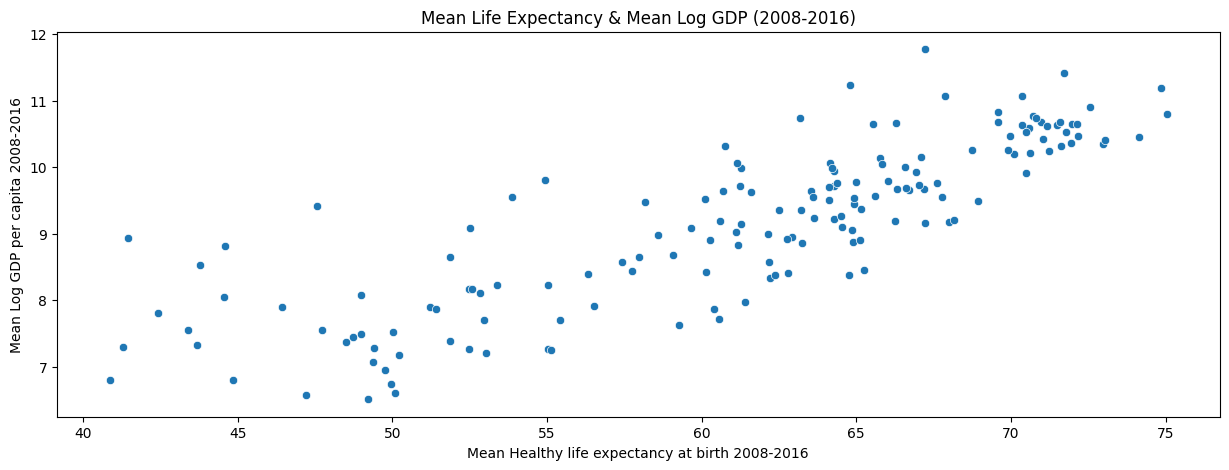

In [36]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x = life_expectancy_countries["Mean Healthy life expectancy at birth 2008-2016"], y = gdp_per_capita_countries["Mean Log GDP per capita 2008-2016"])
plt.title("Mean Life Expectancy & Mean Log GDP (2008-2016)")

From the visualization above, we can see that there is a noticable positive trend from 2008 to 2016 between the mean healthy life expectancy at birth and the mean log GDP per capita. A proper hypothesis test will be run in order to confirm if there is statistical significance.

Null Hypotheses: There is no relationship between the mean healthy life expectancy at birth and the mean log GDP per capita. In other words, the observed values are due to random chance alone.

**Visualization 2**

In [38]:
# Are people getting more or less happy?
life_ladder_mean = new_world.groupby("year")[["Life Ladder"]].mean().rename(columns={"Life Ladder":"Mean Life Ladder"})
life_ladder_mean

,Mean Life Ladder
year,
2005,6.446164
2006,5.196935
2007,5.418291
2008,5.418554
2009,5.457640
2010,5.496782
2011,5.424088
2012,5.443751
2013,5.394568


<Axes: xlabel='year', ylabel='Mean Life Ladder'>

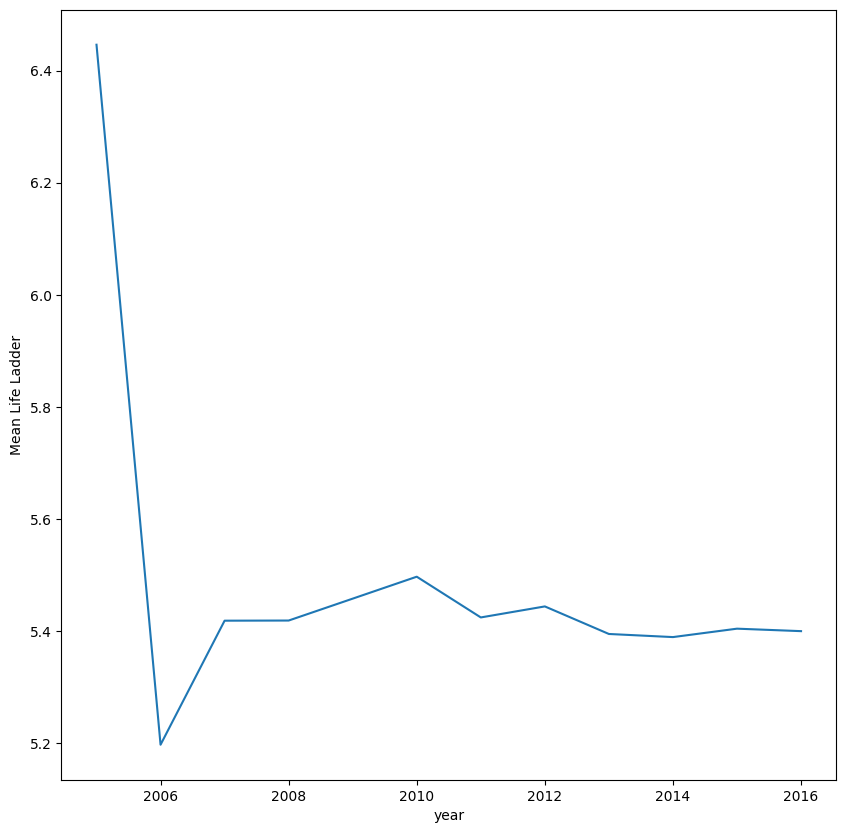

In [39]:
plt.figure(figsize=(10, 10))
sns.lineplot(data = life_ladder_mean, x = "year", y = "Mean Life Ladder")

The second visualization allowed us to make an interesting observation. What happened in 2006 that resulted in such a dramatic decline in the life ladder, a.k.a. the happiness score?

We will be doing an analysis of global records to find reasons as to why this happened.

In the graph, we see a peak of happiness in 2010 and decreases as we go into 2014 with a slight increase in 2016.

**Visualization 3**

In [40]:
#Does confidence in governments create a sense of freedom?
year_grouped = new_world.groupby("year")
freedom_confidence_mean = year_grouped[["Freedom to make life choices", "Confidence in national government"]].mean()
freedom_confidence_mean

,Freedom to make life choices,Confidence in national government
year,,
2005,0.829618,0.425586
2006,0.730508,0.489080
2007,0.687329,0.460338
2008,0.688365,0.470147
2009,0.687435,0.476959
2010,0.708278,0.485382
2011,0.731751,0.477830
2012,0.710855,0.440745
2013,0.727868,0.443250


<Axes: xlabel='Confidence in national government', ylabel='Freedom to make life choices'>

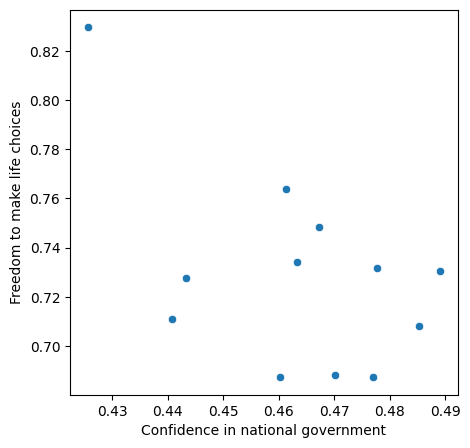

In [33]:
plt.figure(figsize=(5,5))
sns.scatterplot(data = freedom_confidence_mean, x = "Confidence in national government", y = "Freedom to make life choices")

We can see that there is not a strong correlation between freedom to make life choices and confidence in government. Normally, one would think confidence in a countries government implies more opportunies but of course we cannot say this is causation.


We will conduct a test against our null hypothesis, which states that there is no relationship between a populations confidence in a national government, and the freedom to make life choices.

---
## 3. Results

You're welcome to organize your final file as needed.  You will certainly need a results section and a conclusion section.

---

## 4. Conclusion